In [1]:
import pandas as pd 

In [2]:
data = pd.read_excel('lungsCancerdataset.xlsx')

In [3]:
data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
from sklearn.model_selection import train_test_split
data.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [5]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [6]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(['Patient Id','Level'],axis=1),data['Level'],test_size=0.1,random_state=42)

In [7]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((900, 23), (100, 23), (900,), (100,))

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
model = GaussianNB()

In [10]:
model.fit(X_train,y_train)

GaussianNB()

In [11]:
y_pred=model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

In [13]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n        High       0.97      0.84      0.90        44\n         Low       0.82      1.00      0.90        23\n      Medium       0.82      0.85      0.84        33\n\n    accuracy                           0.88       100\n   macro avg       0.87      0.90      0.88       100\nweighted avg       0.89      0.88      0.88       100\n'

In [17]:
import joblib

In [18]:
joblib.dump(model,'predictmodel.joblib')

['predictmodel.joblib']

In [21]:
(data['Smoking'].min(),data['Smoking'].max())

(1, 8)

In [22]:
(data['Passive Smoker'].min(),data['Passive Smoker'].max())

(1, 8)

In [23]:
(data['Chest Pain'].min(),data['Chest Pain'].max())

(1, 9)

In [4]:
import seaborn as sns

In [11]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['Level']=lc.fit_transform(data['Level'])
data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,0


In [12]:
data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,0


<Axes: >

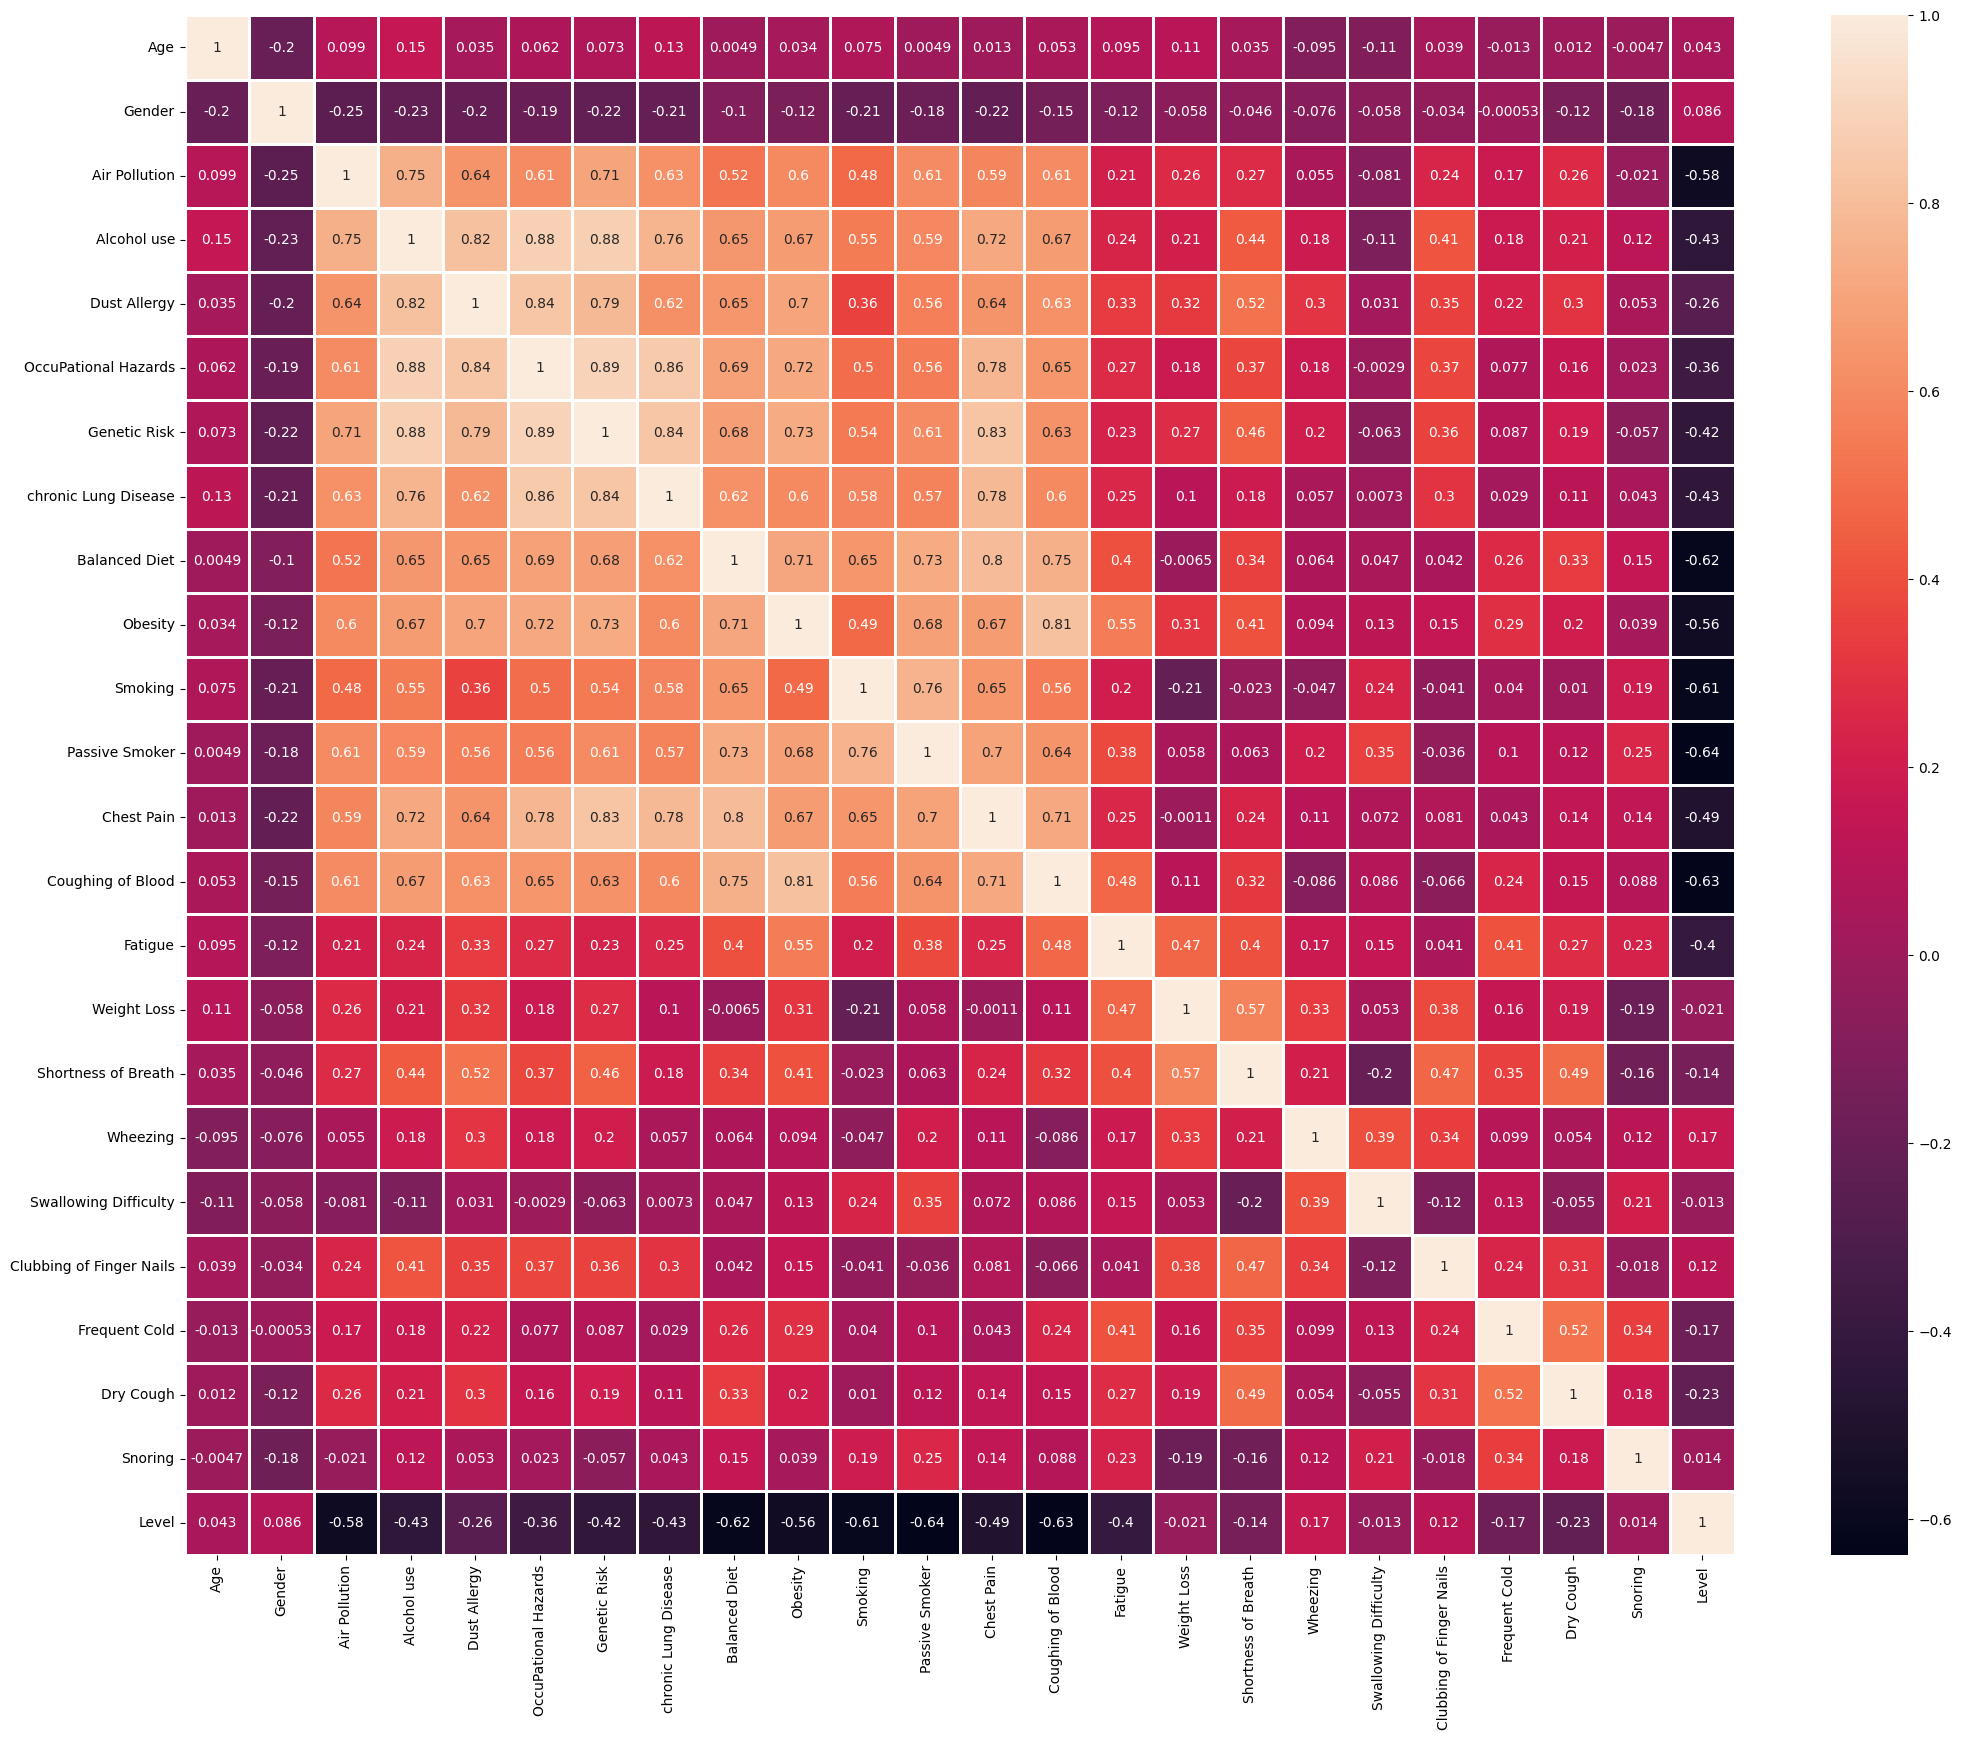

In [19]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
sns.heatmap(data.drop('Patient Id',axis=1).corr(),annot=True,linewidths=1)